# Testing various methods on CIFAR10

In [1]:
#import libraries
import torch
import torchvision
import torchvision.transforms as transforms

In [40]:
from cubic_newton import CubicNewton

In [2]:
#load dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


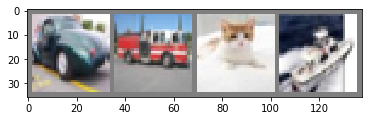

  car truck   cat  ship


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x




[1,  2000] loss: 1.836
[1,  4000] loss: 1.579
[1,  6000] loss: 1.516
[1,  8000] loss: 1.460
[1, 10000] loss: 1.417
[1, 12000] loss: 1.402
Finished Training


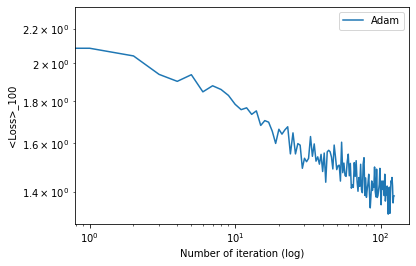

In [18]:
import torch.optim as optim
from matplotlib import pyplot as plt

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

Y = []

for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
        avg_loss += loss.item()
        if i % 100 == 99:
            Y.append(avg_loss / 100)
            avg_loss = 0.0

print('Finished Training')

plt.plot(range(len(Y)), Y)

In [22]:
import torch.optim as optim
from matplotlib import pyplot as plt

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Z = []

for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
        avg_loss += loss.item()
        if i % 100 == 99:
            Z.append(avg_loss / 100)
            avg_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.226
[1,  4000] loss: 1.911
[1,  6000] loss: 1.694
[1,  8000] loss: 1.612
[1, 10000] loss: 1.545
[1, 12000] loss: 1.514
Finished Training


In [46]:
import torch.optim as optim
from matplotlib import pyplot as plt

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.LBFGS(net.parameters(), lr=0.001)

A = []

for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        def closure():
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            return loss
        
        optimizer.step(closure)
            

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
        avg_loss += loss.item()
        if i % 100 == 99:
            A.append(avg_loss / 100)
            avg_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.309
[1,  4000] loss: 2.307
[1,  6000] loss: 2.308
[1,  8000] loss: 2.307
[1, 10000] loss: 2.307
[1, 12000] loss: 2.307
Finished Training


In [48]:
import torch.optim as optim
from matplotlib import pyplot as plt

net = Net()

criterion = nn.CrossEntropyLoss()
inputs, labels = data
optimizer = CubicNewton(net.parameters(), net(inputs), lr=0.001)

B = []

for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        def closure():
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            return loss
        
        optimizer.step(closure)
            

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
        avg_loss += loss.item()
        if i % 100 == 99:
            B.append(avg_loss / 100)
            avg_loss = 0.0

print('Finished Training')

RuntimeError: grad can be implicitly created only for scalar outputs

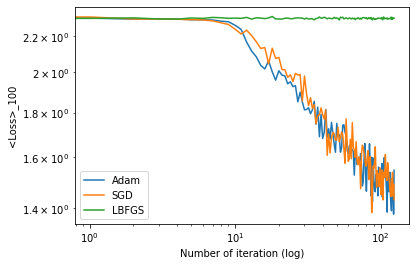

In [38]:
plt.plot(range(len(Y)), Y)
plt.plot(range(len(Z)), Z)
plt.plot(range(len(A)), A)
plt.plot(range(len(B)), B)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of iteration (log)')
plt.ylabel('<Loss>_100')
plt.legend(['Adam', 'SGD', 'LBFGS', 'Cubic-Newton'])
plt.show()

In [ ]:
PATH = './cifar_net-Adam.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

In [ ]:
net.to(device)

In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)